# **TAREA MÓDULO 41 - Daniel Ortega**

Generar un archivo tipo Notebook de Python que contenga:
- Importación del archivo de uso.
- Exploración básica EDA usando pandas.
- Validar si existen nulos o o información vacia, tipo de datos, describe, nunique.
- Correlación y heatmap, visualización de distribución sns.distplot.
- Eliminar variables que tengan alta correlación y/o no sean necesarias.
- Reportes por grupos: estado civil, educación, trabajo - cuántos registros.
- Análisis univariado y bivariado basado en la predicción 
- Dividir dataset entre training y test (70/30)

_____

## Importación del archivo de uso

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import sys

In [3]:
os.chdir(r'C:\Users\danielortega\OneDrive - HOTELERA YALKUITO SA DE CV\Desktop\No Borrar Daniel\30 Data Analyst - Curso\47_Módulo_41_Introducción_Machine_Learning')

In [4]:
df = pd.read_csv('bank-full.csv', sep=';')

________

## Exploración básica EDA usando Pandas

## Validar si existen nulos o información vacia, tipo de datos , describe o nunique

In [5]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7637,48,technician,married,secondary,yes,0,no,no,unknown,30,may,682,1,-1,0,unknown,yes
28213,59,management,married,secondary,no,1245,no,no,cellular,29,jan,285,1,-1,0,unknown,no
25716,59,housemaid,married,primary,no,935,yes,no,cellular,19,nov,103,3,166,2,failure,no
38283,28,admin.,single,secondary,no,7,yes,no,cellular,15,may,87,1,-1,0,unknown,no
17671,43,entrepreneur,married,tertiary,yes,0,no,yes,telephone,29,jul,184,4,-1,0,unknown,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [8]:
df.shape

(45211, 17)

In [9]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [10]:
print(f'Existen {df.isnull().sum().sum()} valores nulos en el dataset')

Existen 0 valores nulos en el dataset


In [11]:
missing_values = df.isnull().sum()
missing_values[:10]

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
dtype: int64

## **INSIGHTS DEL EDA Y NULOS**

- Tenemos 45,211 filas por 17 columnas.
- Tenemos algunas columnas que podemos modificar a categoría como puede ser 'marital', 'education', tal vez 'job'.
- No tenemos nulos y de acuerdo con los valores únicos es que podemos modificar a categoría algunas columnas.

______

## Correlación y Heatmap

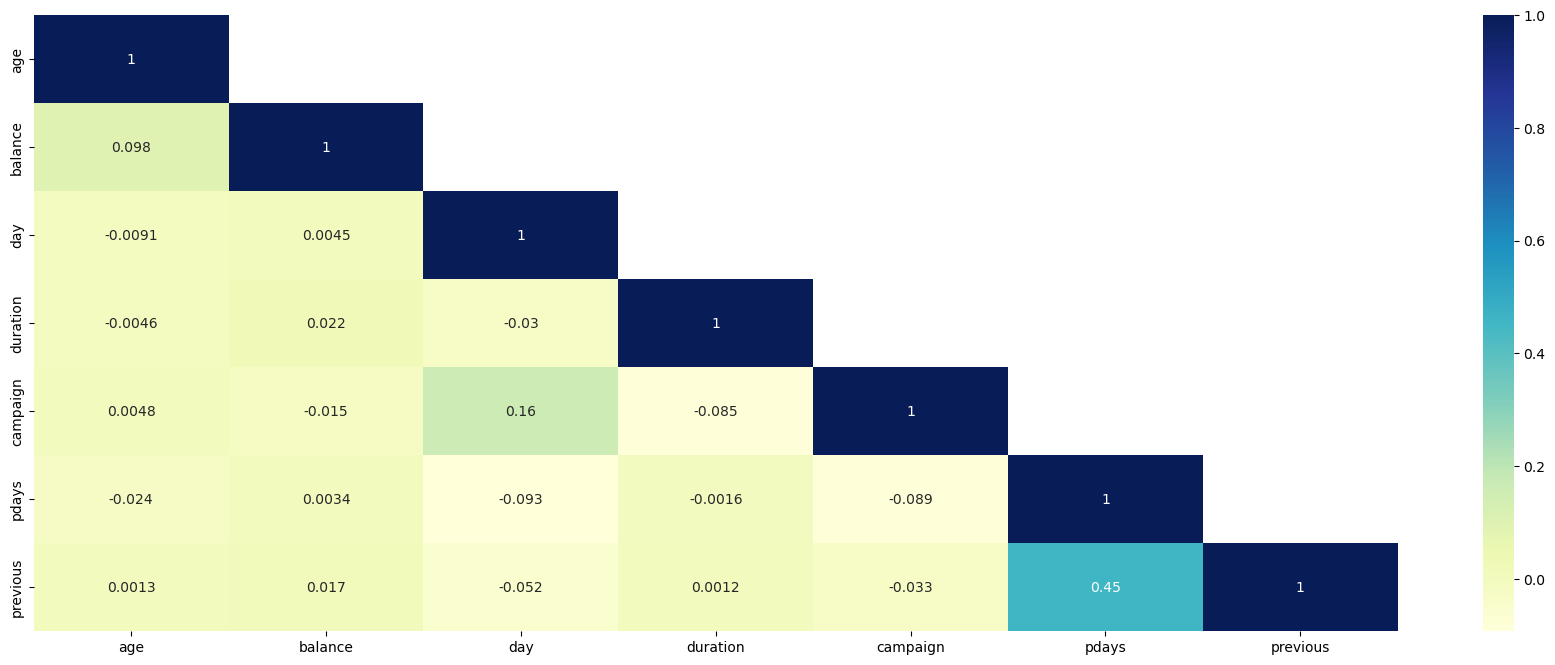

In [13]:
import matplotlib.pyplot as plt

df_numerico = df.select_dtypes(include=['number'])

plt.figure(figsize=(22, 8))
corr_df = corr = df_numerico.corr(method='pearson')
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(bool))
hmap= sns.heatmap(df_lt, cmap='YlGnBu', annot=True)

In [14]:
print('Lista completa de columnas')
print('-----------------------------------')
print(df_numerico.columns)
print(len(df_numerico.columns), 'columnas en total')

Lista completa de columnas
-----------------------------------
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')
7 columnas en total


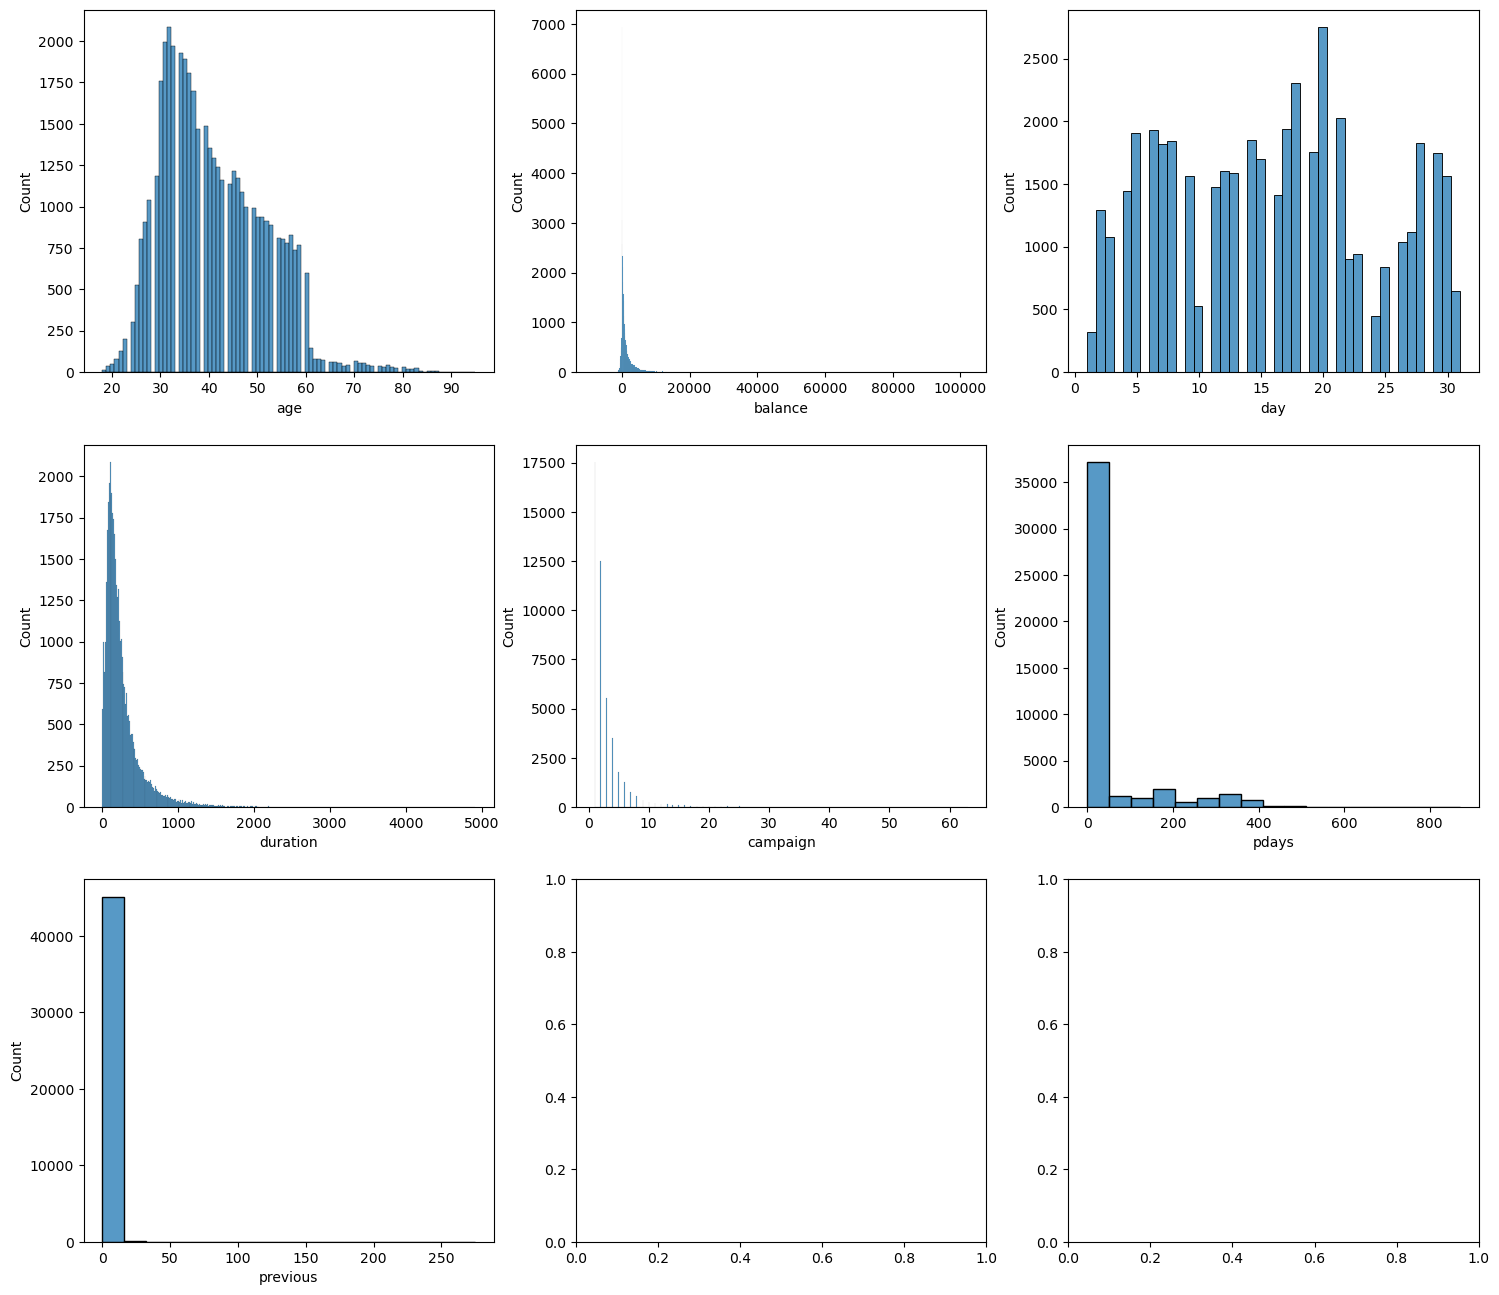

In [16]:
fig, axes = plt.subplots(nrows=3,
                         ncols=3,
                         figsize=(18,16))
for i, col in enumerate(df_numerico):
    sns.histplot(df_numerico[col],ax=axes[i//3, i%3], kde=False)

## **INSIGHTS**

- Las columnas de 'duration', 'campaign', 'pdays', 'previous'y 'balance' tiene mucho sesgo, lo cual no nos sirve mucho para el modelo ML por lo que al igual que en ejercicio del profesor debemos hacer las mismas columnas pero en log. 
- No tenemos variables con una alta correlación por lo que no debemos eliminar ninguna columna por esa razón.

____

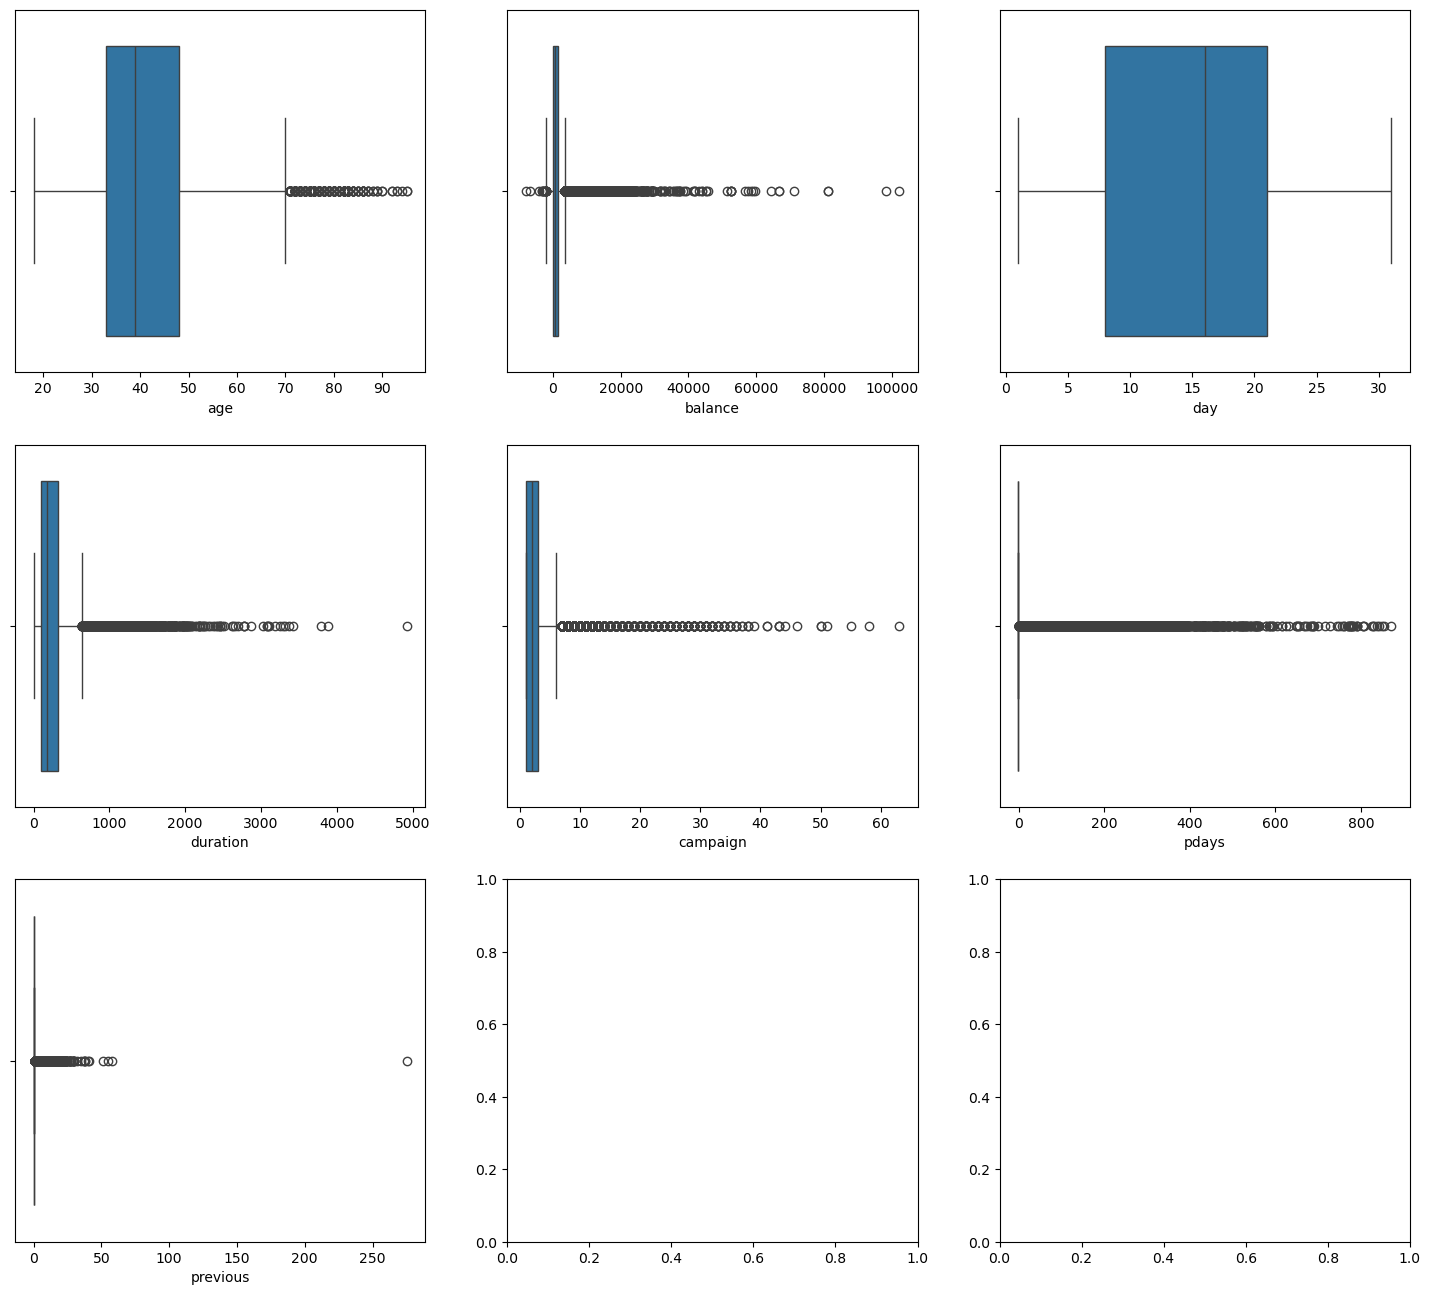

In [19]:
import seaborn as sns
#ax = sns.boxplot(x=df_numerico['balance'])

fig, axes = plt.subplots(nrows=3,
                         ncols=3,
                         figsize=(18,16))
for i, col in enumerate(df_numerico):
    sns.boxplot(x=df_numerico[col],ax=axes[i//3, i%3])

In [20]:
df.groupby('marital')[df.select_dtypes(include='number').columns].mean().T.round(2)

marital,divorced,married,single
age,45.78,43.41,33.70
balance,1178.87,1425.93,1301.50
day,15.80,15.85,15.71
duration,262.52,253.41,266.50
campaign,2.63,2.84,2.65
pdays,41.00,37.95,44.65
previous,0.55,0.56,0.64


In [21]:
df.groupby('education')[df.select_dtypes(include='number').columns].mean().T.round(2)

education,primary,secondary,tertiary,unknown
age,45.87,39.96,39.59,44.51
balance,1250.95,1154.88,1758.42,1526.75
day,15.42,15.76,16.09,15.81
duration,255.93,258.69,258.52,257.31
campaign,2.83,2.70,2.83,2.85
pdays,36.08,42.35,39.02,36.86
previous,0.49,0.57,0.66,0.49


In [27]:
print(df['education'].unique())
print(df['marital'].unique())
print(df['default'].unique())
print(df['job'].unique())
print(df['housing'].unique())
print(df['loan'].unique())
print(df['contact'].unique())
print(df['poutcome'].unique())
print(df['y'].unique())

['tertiary' 'secondary' 'unknown' 'primary']
['married' 'single' 'divorced']
['no' 'yes']
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['yes' 'no']
['no' 'yes']
['unknown' 'cellular' 'telephone']
['unknown' 'failure' 'other' 'success']
['no' 'yes']


## **INSIGHTS DE FIELD ENGINEERING**

- Creo que podemos quitar la columna de 'y', no nos aporta nada pues no sabemos a qué corresponde.
- las demás creo que podemos colocarlas o convertirlas mejor dicho a categorías, pues no son campos abiertos, si no que son una categorización que hace el banco.

In [ ]:
df['education'] = df['education'].astype('category')
df['marital'] = df['marital'].astype('category')
df['default'] = df['default'].astype('category')
df['job'] = df['job'].astype('category')
df['housing'] = df['housing'].astype('category')
df['loan'] = df['loan'].astype('category')


In [29]:
df.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact        object
day             int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

____

## **PREPRACIÓN FINAL ANTES DEL SPLIT**

In [30]:
df2 = df.copy()

In [31]:
df2.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
43329,25,blue-collar,single,secondary,no,303,no,no,cellular,18,mar,265,1,-1,0,unknown,yes
38754,24,blue-collar,single,secondary,no,6,yes,no,cellular,18,may,16,10,-1,0,unknown,no
33950,27,technician,single,tertiary,no,4003,no,no,cellular,30,apr,584,1,-1,0,unknown,no
45176,54,admin.,married,secondary,no,66,yes,no,cellular,11,nov,167,1,-1,0,unknown,yes
17630,38,technician,single,secondary,no,1655,no,no,cellular,29,jul,392,2,-1,0,unknown,no


In [32]:
df2['balance_log'] = np.log(df2['balance'] + 1)
df2['duration_log'] = np.log(df2['duration'] + 1)
df2['campaign_log'] = np.log(df2['campaign'] + 1)
df2['pdays_log'] = np.log(df2['pdays'] + 1)
df2['previous_log'] = np.log(df2['previous'] + 1)

c:\Users\danielortega\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\danielortega\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\danielortega\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [34]:
df2.sample(5)
#df.shape

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,balance_log,duration_log,campaign_log,pdays_log,previous_log
39696,32,admin.,single,secondary,no,1649,no,no,cellular,27,...,2,-1,0,unknown,no,7.408531,5.323010,1.098612,-inf,0.000000
36189,31,admin.,single,secondary,no,78,yes,no,cellular,11,...,1,370,1,other,no,4.369448,5.888878,0.693147,5.916202,0.693147
21886,30,management,married,tertiary,no,1390,no,no,cellular,20,...,4,-1,0,unknown,no,7.237778,6.315358,1.609438,-inf,0.000000
13374,58,retired,married,tertiary,no,941,no,yes,cellular,9,...,1,-1,0,unknown,no,6.848005,5.541264,0.693147,-inf,0.000000
34367,57,technician,married,tertiary,no,1103,no,no,cellular,4,...,2,-1,0,unknown,no,7.006695,5.991465,1.098612,-inf,0.000000


In [35]:
cols_num = df2.select_dtypes(include=['number']).columns
cols_cat = df2.select_dtypes(include=['category']).columns

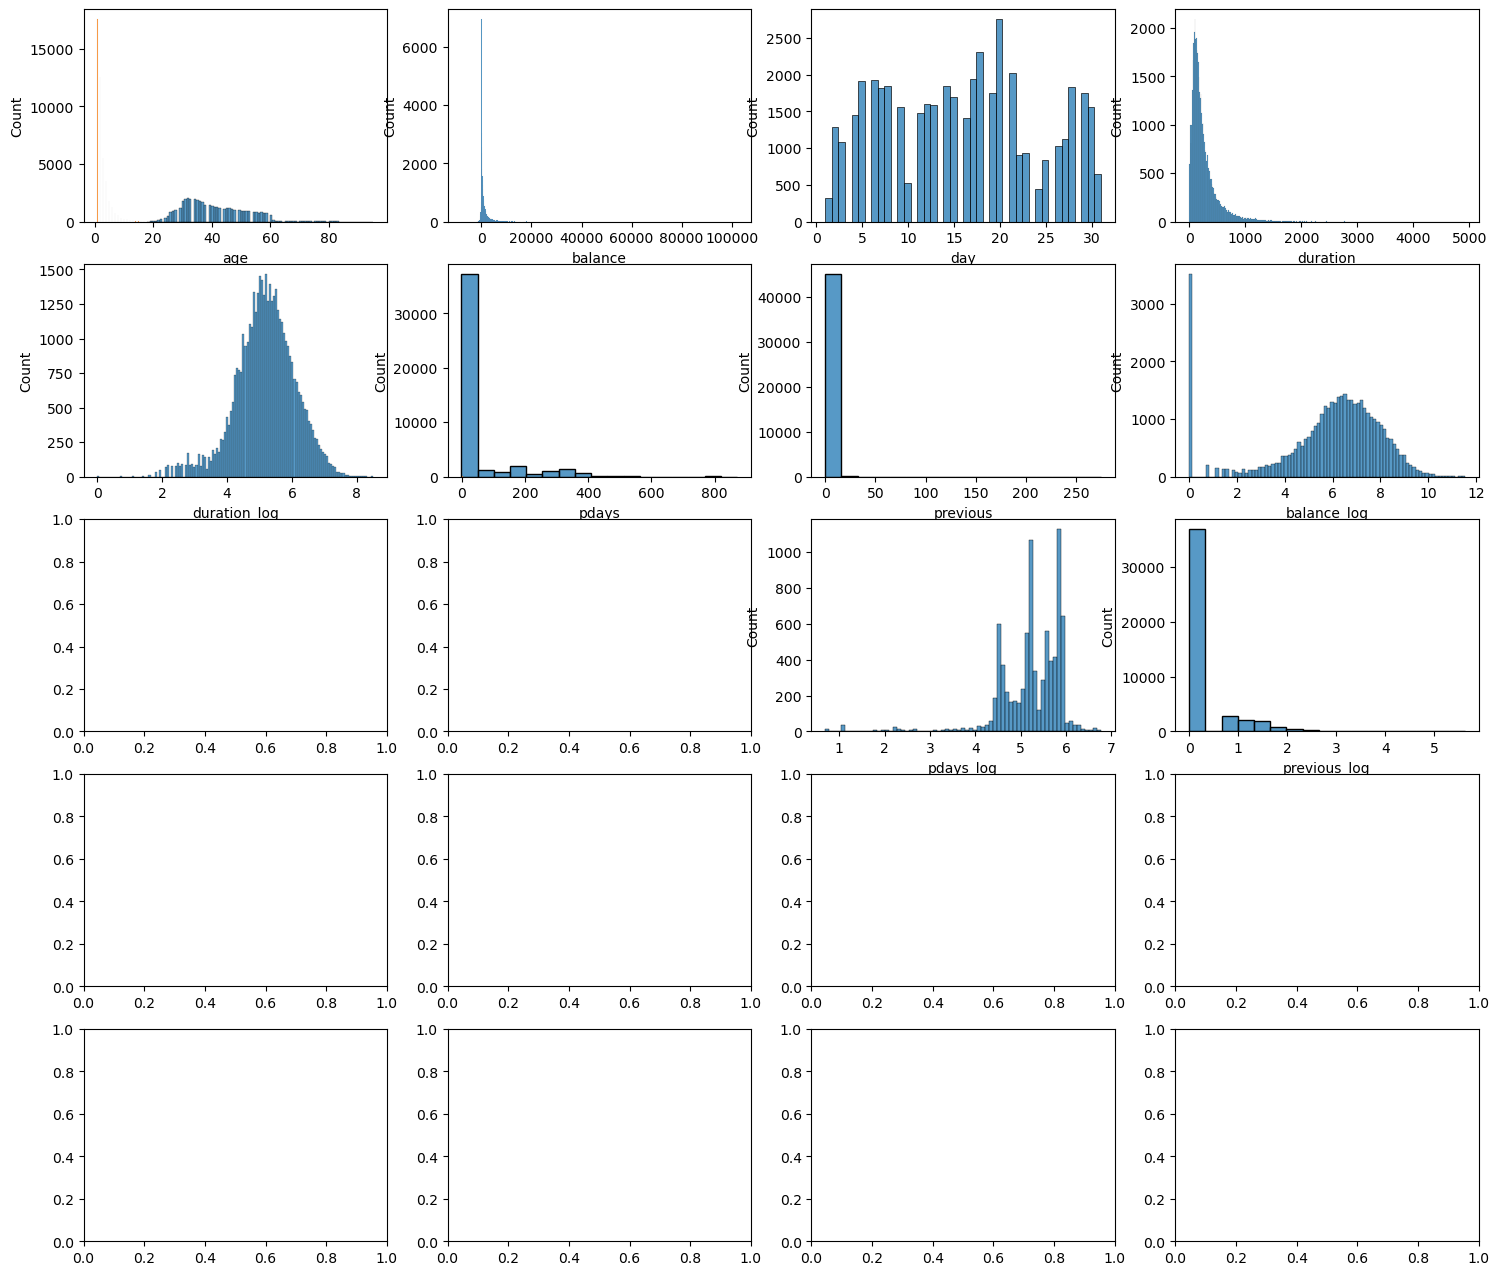

In [ ]:
df2_numerico = df2.select_dtypes(include=['number'])

fig, axes = plt.subplots(nrows=5,
                         ncols=4,
                         figsize=(18,16))
for i, col in enumerate(df2_numerico):

    sns.histplot(df2_numerico[col],ax=axes[i//5, i%4], kde=False)


## **INSIGHTS**

- Las columnas con log tienen mucha más información que las primeras. 

_____


In [39]:
from sklearn.model_selection import train_test_split

x = df2.drop('y', axis=1)
y = df2['y']

x = pd.get_dummies(x, drop_first=True)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [40]:
x_train.head(5)

,age,balance,day,duration,campaign,pdays,previous,balance_log,duration_log,campaign_log,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
6149,32,-238,27,427,1,-1,0,NaN,6.059123,0.693147,...,False,False,False,True,False,False,False,False,False,True
12403,34,-478,27,111,4,-1,0,NaN,4.718499,1.609438,...,False,True,False,False,False,False,False,False,False,True
21645,32,266,19,168,2,-1,0,5.587249,5.129899,1.098612,...,False,False,False,False,False,False,False,False,False,True
29580,36,13,3,150,4,-1,0,2.639057,5.017280,1.609438,...,False,False,False,False,False,False,False,False,False,True
31245,23,486,3,87,1,-1,0,6.188264,4.477337,0.693147,...,False,False,True,False,False,False,False,False,False,True


In [46]:
y_train.head(5)

6149     no
12403    no
21645    no
29580    no
31245    no
Name: y, dtype: object

In [41]:
print("{0:0.2f}% de los datos de entrenamiento".format(len(x_train) / len(df2) * 100))
print("{0:0.2f}% de los datos de testing".format(len(x_test) / len(df2) * 100))
print("{0:0.2f}% de los datos de entrenamiento".format(len(y_train) / len(df2) * 100))
print("{0:0.2f}% de los datos de testing".format(len(y_test) / len(df2) * 100))

70.00% de los datos de entrenamiento
30.00% de los datos de testing
70.00% de los datos de entrenamiento
30.00% de los datos de testing
